In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
print(train_images.shape)

(60000, 28, 28)


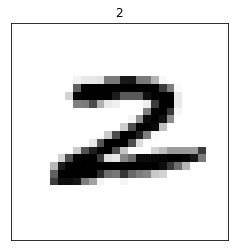

In [3]:
i = 199
plt.figure()
plt.imshow(train_images[i], cmap = 'gray_r')
plt.xticks([])
plt.yticks([])
plt.title(train_labels[i])
plt.show()

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [6]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [7]:
train_images.reshape(-1, 784).astype('float32') / 255.0
test_images.reshape(-1, 784).astype('float32') / 255.0

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
train_images_norm = train_images.reshape(-1, 784).astype('float32') / 255.0
test_images_norm = test_images.reshape(-1, 784).astype('float32') / 255.0

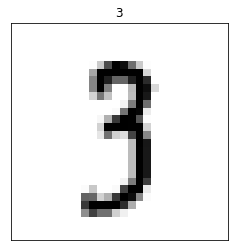

In [9]:
i = 856
plt.figure()
plt.imshow(train_images_norm[i].reshape(28,28), cmap = 'gray_r')
plt.xticks([])
plt.yticks([])
plt.title(train_labels[i])
plt.show()

In [10]:
model = keras.Sequential([
    keras.Input(shape=784),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss= keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [12]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3778 - accuracy: 0.8924
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1859 - accuracy: 0.9461
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1467 - accuracy: 0.9571: 0s - loss: 0.1472 - accuracy
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1250 - accuracy: 0.9628
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1104 - accuracy: 0.9669: 1s - loss: 0.1082  - ETA: 0s - loss:
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0979 - accuracy: 0.9709
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0902 - accuracy: 0.9730
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0824 - accuracy: 0.9748
Epoch 9/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0767 - accuracy: 0.97 - 3s 2ms/step - loss

In [13]:
history_dict = h.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


Text(0, 0.5, 'Accuracy')

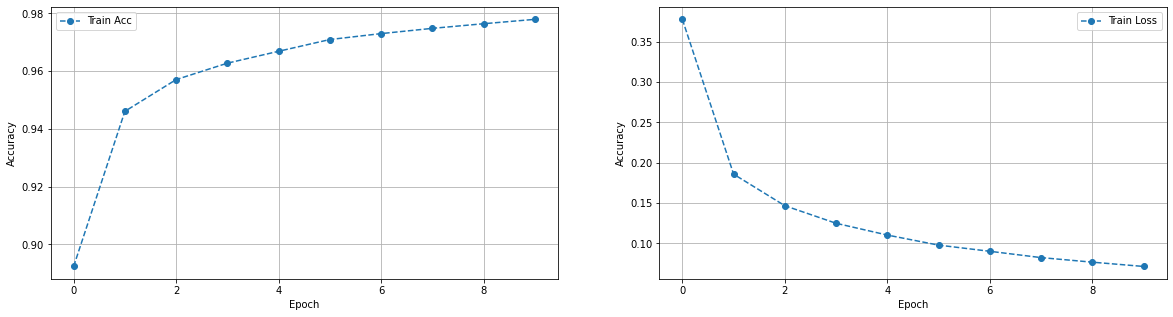

In [16]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
#plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
#plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')